In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

# New Section

In [ ]:
df=pd.read_csv("cumulative.csv")
print(df)

      rowid     kepid kepoi_name   kepler_name koi_disposition  \
0         1  10797460  K00752.01  Kepler-227 b       CONFIRMED   
1         2  10797460  K00752.02  Kepler-227 c       CONFIRMED   
2         3  10811496  K00753.01           NaN  FALSE POSITIVE   
3         4  10848459  K00754.01           NaN  FALSE POSITIVE   
4         5  10854555  K00755.01  Kepler-664 b       CONFIRMED   
...     ...       ...        ...           ...             ...   
2654   2655   5652983  K00371.01           NaN  FALSE POSITIVE   
2655   2656   6471021  K00372.01  Kepler-539 b       CONFIRMED   
2656   2657   7906671  K03018.01           NaN  FALSE POSITIVE   
2657   2658   8709688  K03019.01           NaN       CANDIDATE   
2658   2659   8241079  K03020.01           NaN       CANDIDATE   

     koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0           CANDIDATE      1.000              0              0              0   
1           CANDIDATE      0.969             

<ipython-input-7-a25d76d5adb3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_column, data=df, palette='viridis')


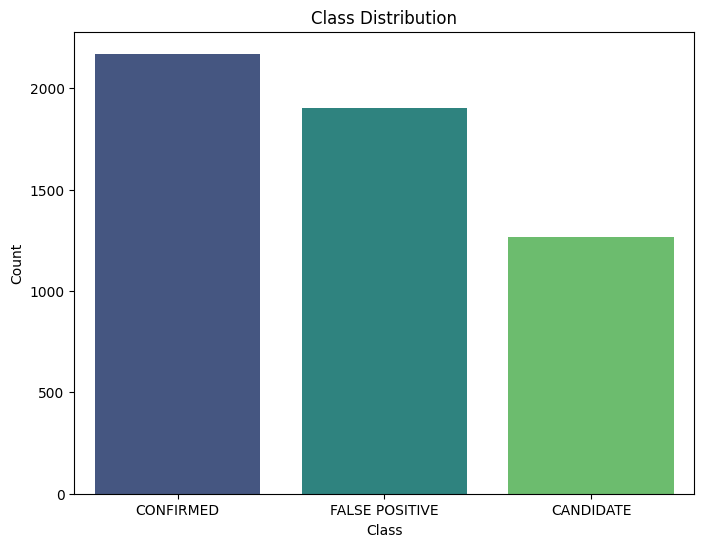

In [ ]:
# Assuming 'koi_disposition' is the column representing classes
class_column = 'koi_disposition'

# Plot histogram for class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=class_column, data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

In [ ]:
missing_values =df.isnull().sum()
print(missing_values)

rowid                   0
kepid                   0
kepoi_name              0
kepler_name          3164
koi_disposition         0
koi_pdisposition        0
koi_score             328
koi_fpflag_nt           0
koi_fpflag_ss           0
koi_fpflag_co           0
koi_fpflag_ec           0
koi_period              0
koi_period_err1        89
koi_period_err2        89
koi_time0bk             0
koi_time0bk_err1       89
koi_time0bk_err2       89
koi_impact             60
koi_impact_err1        89
koi_impact_err2        89
koi_duration            0
koi_duration_err1      89
koi_duration_err2      89
koi_depth              61
koi_depth_err1         90
koi_depth_err2         90
koi_prad               61
koi_prad_err1          61
koi_prad_err2          61
koi_teq                61
koi_teq_err1         5335
koi_teq_err2         5335
koi_insol              55
koi_insol_err1         55
koi_insol_err2         55
koi_model_snr          61
koi_tce_plnt_num      259
koi_tce_delivname     259
koi_steff   

1.Median Imputation:
Pros: Less sensitive to outliers compared to mean imputation.

Cons: Does not handle skewed distributions well.

2.Mode Imputation:
Pros: Suitable for categorical variables.

Cons: May not be ideal for continuous variables with multiple modes.

3.Regression Imputation:
Pros: Considers relationships between variables.

Cons: Requires more computational resources, and assumptions about the relationships must be met.

4.k-NN Imputation:
Pros: Takes into account the similarity between data points.

Cons: Computationally expensive for large datasets.

# Imputation method - Mean Imputation
"""
Pros of Mean Imputation:
1. Simple and quick to implement.
2. Preserves the overall mean of the variable, which can be important for certain statistical analyses.

Cons of Mean Imputation:
1. May not be suitable for variables with extreme values (outliers) as it can be sensitive to them.
2. Can introduce bias, especially when missing data is not completely random.
3. Does not consider relationships between variables, and may not accurately represent the underlying data distribution.
"""

In [ ]:
column_thresold=500

In [ ]:
redundent_information= missing_values[missing_values> column_thresold]
print(redundent_information)

kepler_name     3164
koi_teq_err1    5335
koi_teq_err2    5335
dtype: int64


In [ ]:
#best_datase= df.drop(re,inplace=True)

In [ ]:
redundant_information = missing_values[missing_values > column_thresold]


In [ ]:
df.drop(columns=redundant_information.index, inplace=True)

In [ ]:
print(df)

      rowid     kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0         1  10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1         2  10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2         3  10811496  K00753.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
3         4  10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4         5  10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...     ...       ...        ...             ...              ...        ...   
5330   5331   4037163  K03793.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5331   5332   5535890  K03865.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5332   5333   5215980  K03866.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5333   5334   9353742  K03867.01       CONFIRMED        CANDIDATE      1.000   
5334   5335   9178185  K03868.01  FALSE POSITIVE   FALSE POSITIVE      0.000   

      koi_fpflag_nt  koi_fpflag_ss  koi

remove  specified those row which which column deleted

In [ ]:
#ssing_row=["koi_kepmag"]


In [ ]:
# Drop rows with missing values in specific columns
columns_with_missing_rows = ['koi_kepmag']
df.dropna(subset=columns_with_missing_rows, inplace=True)
#Drop Na function in Pandas is used to remove missing values from a dataframe

In [ ]:
# Impute missing values in specific columns using mean
columns_to_impute_mean = ['koi_score', 'koi_impact', 'koi_depth', 'koi_prad', 'koi_teq', 'koi_insol', 'koi_model_snr', 'koi_tce_plnt_num']
for column in columns_to_impute_mean:
    mean_value = df[column].mean()
    df[column].fillna(mean_value, inplace=True)

# Display the dataset after dropping columns and rows, and imputing missing values
print("Dataset after Cleaning:")
print(df)

# Save the cleaned dataset to a new file
# Replace 'cleaned_dataset.csv' with the desired file name
df.to_csv('cleaned_dataset.csv', index=False)

Dataset after Cleaning:
      rowid     kepid kepoi_name koi_disposition koi_pdisposition  koi_score  \
0         1  10797460  K00752.01       CONFIRMED        CANDIDATE      1.000   
1         2  10797460  K00752.02       CONFIRMED        CANDIDATE      0.969   
2         3  10811496  K00753.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
3         4  10848459  K00754.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
4         5  10854555  K00755.01       CONFIRMED        CANDIDATE      1.000   
...     ...       ...        ...             ...              ...        ...   
5329   5330  12009347  K03792.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5330   5331   4037163  K03793.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5331   5332   5535890  K03865.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5332   5333   5215980  K03866.01  FALSE POSITIVE   FALSE POSITIVE      0.000   
5333   5334   9353742  K03867.01       CONFIRMED        CANDIDATE      1.000   

      koi_fpfla

<ipython-input-18-a25d76d5adb3>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=class_column, data=df, palette='viridis')


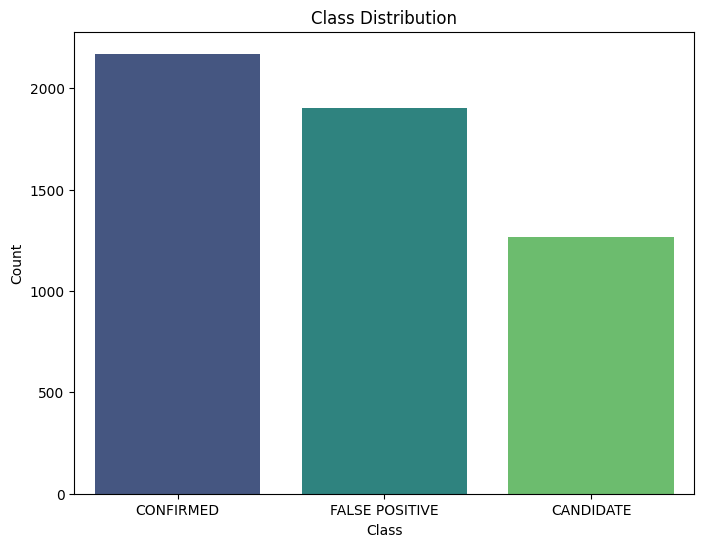

In [ ]:
# Assuming 'koi_disposition' is the column representing classes
class_column = 'koi_disposition'

# Plot histogram for class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x=class_column, data=df, palette='viridis')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()

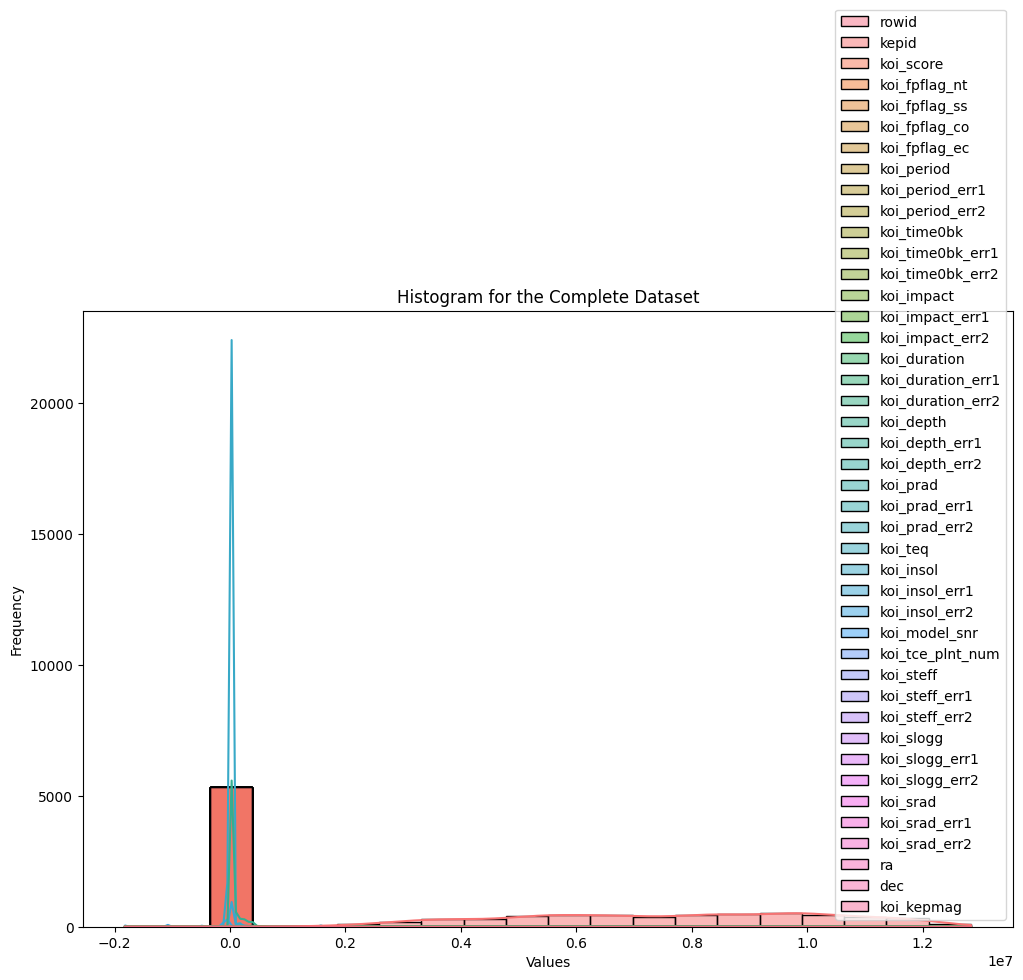

In [ ]:
# Plot histogram for the complete dataset
plt.figure(figsize=(12, 8))
sns.histplot(data=df, bins=20, kde=True, color='skyblue')
plt.title('Histogram for the Complete Dataset')
plt.xlabel('Values')
plt.ylabel('Frequency')
plt.show()

In [ ]:
# Display summary statistics
summary_stastices= df.describe()
print (summary_stastices)

             rowid         kepid    koi_score  koi_fpflag_nt  koi_fpflag_ss  \
count  5334.000000  5.334000e+03  5334.000000    5334.000000    5334.000000   
mean   2667.500000  7.663747e+06     0.641187       0.083052       0.179603   
std    1539.937499  2.688835e+06     0.445133       0.275987       0.383892   
min       1.000000  7.574500e+05     0.000000       0.000000       0.000000   
25%    1334.250000  5.531576e+06     0.000000       0.000000       0.000000   
50%    2667.500000  7.883612e+06     0.971000       0.000000       0.000000   
75%    4000.750000  9.886223e+06     1.000000       0.000000       0.000000   
max    5334.000000  1.283487e+07     1.000000       1.000000       1.000000   

       koi_fpflag_co  koi_fpflag_ec     koi_period  koi_period_err1  \
count    5334.000000    5334.000000    5334.000000      5245.000000   
mean        0.187102       0.106862      60.597538         0.000886   
std         0.390030       0.308966    1781.874895         0.005796   
min 

In [ ]:
# Calculate correlation matrix
correlation_matrix = df.corr()

<ipython-input-21-619f0e6abd1e>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


sns.heatmap: This line creates a heatmap using the heatmap function from the Seaborn library. It takes several parameters:
correlation_matrix: The data to be plotted, in this case, the correlation matrix.
annot=True: Annotates each cell with the numeric value.
cmap='coolwarm': The color map used for the heatmap. 'coolwarm' is a diverging color map that ranges from cool (blue) to warm (red).
fmt=".2f": The format of the annotations, specifying two decimal places

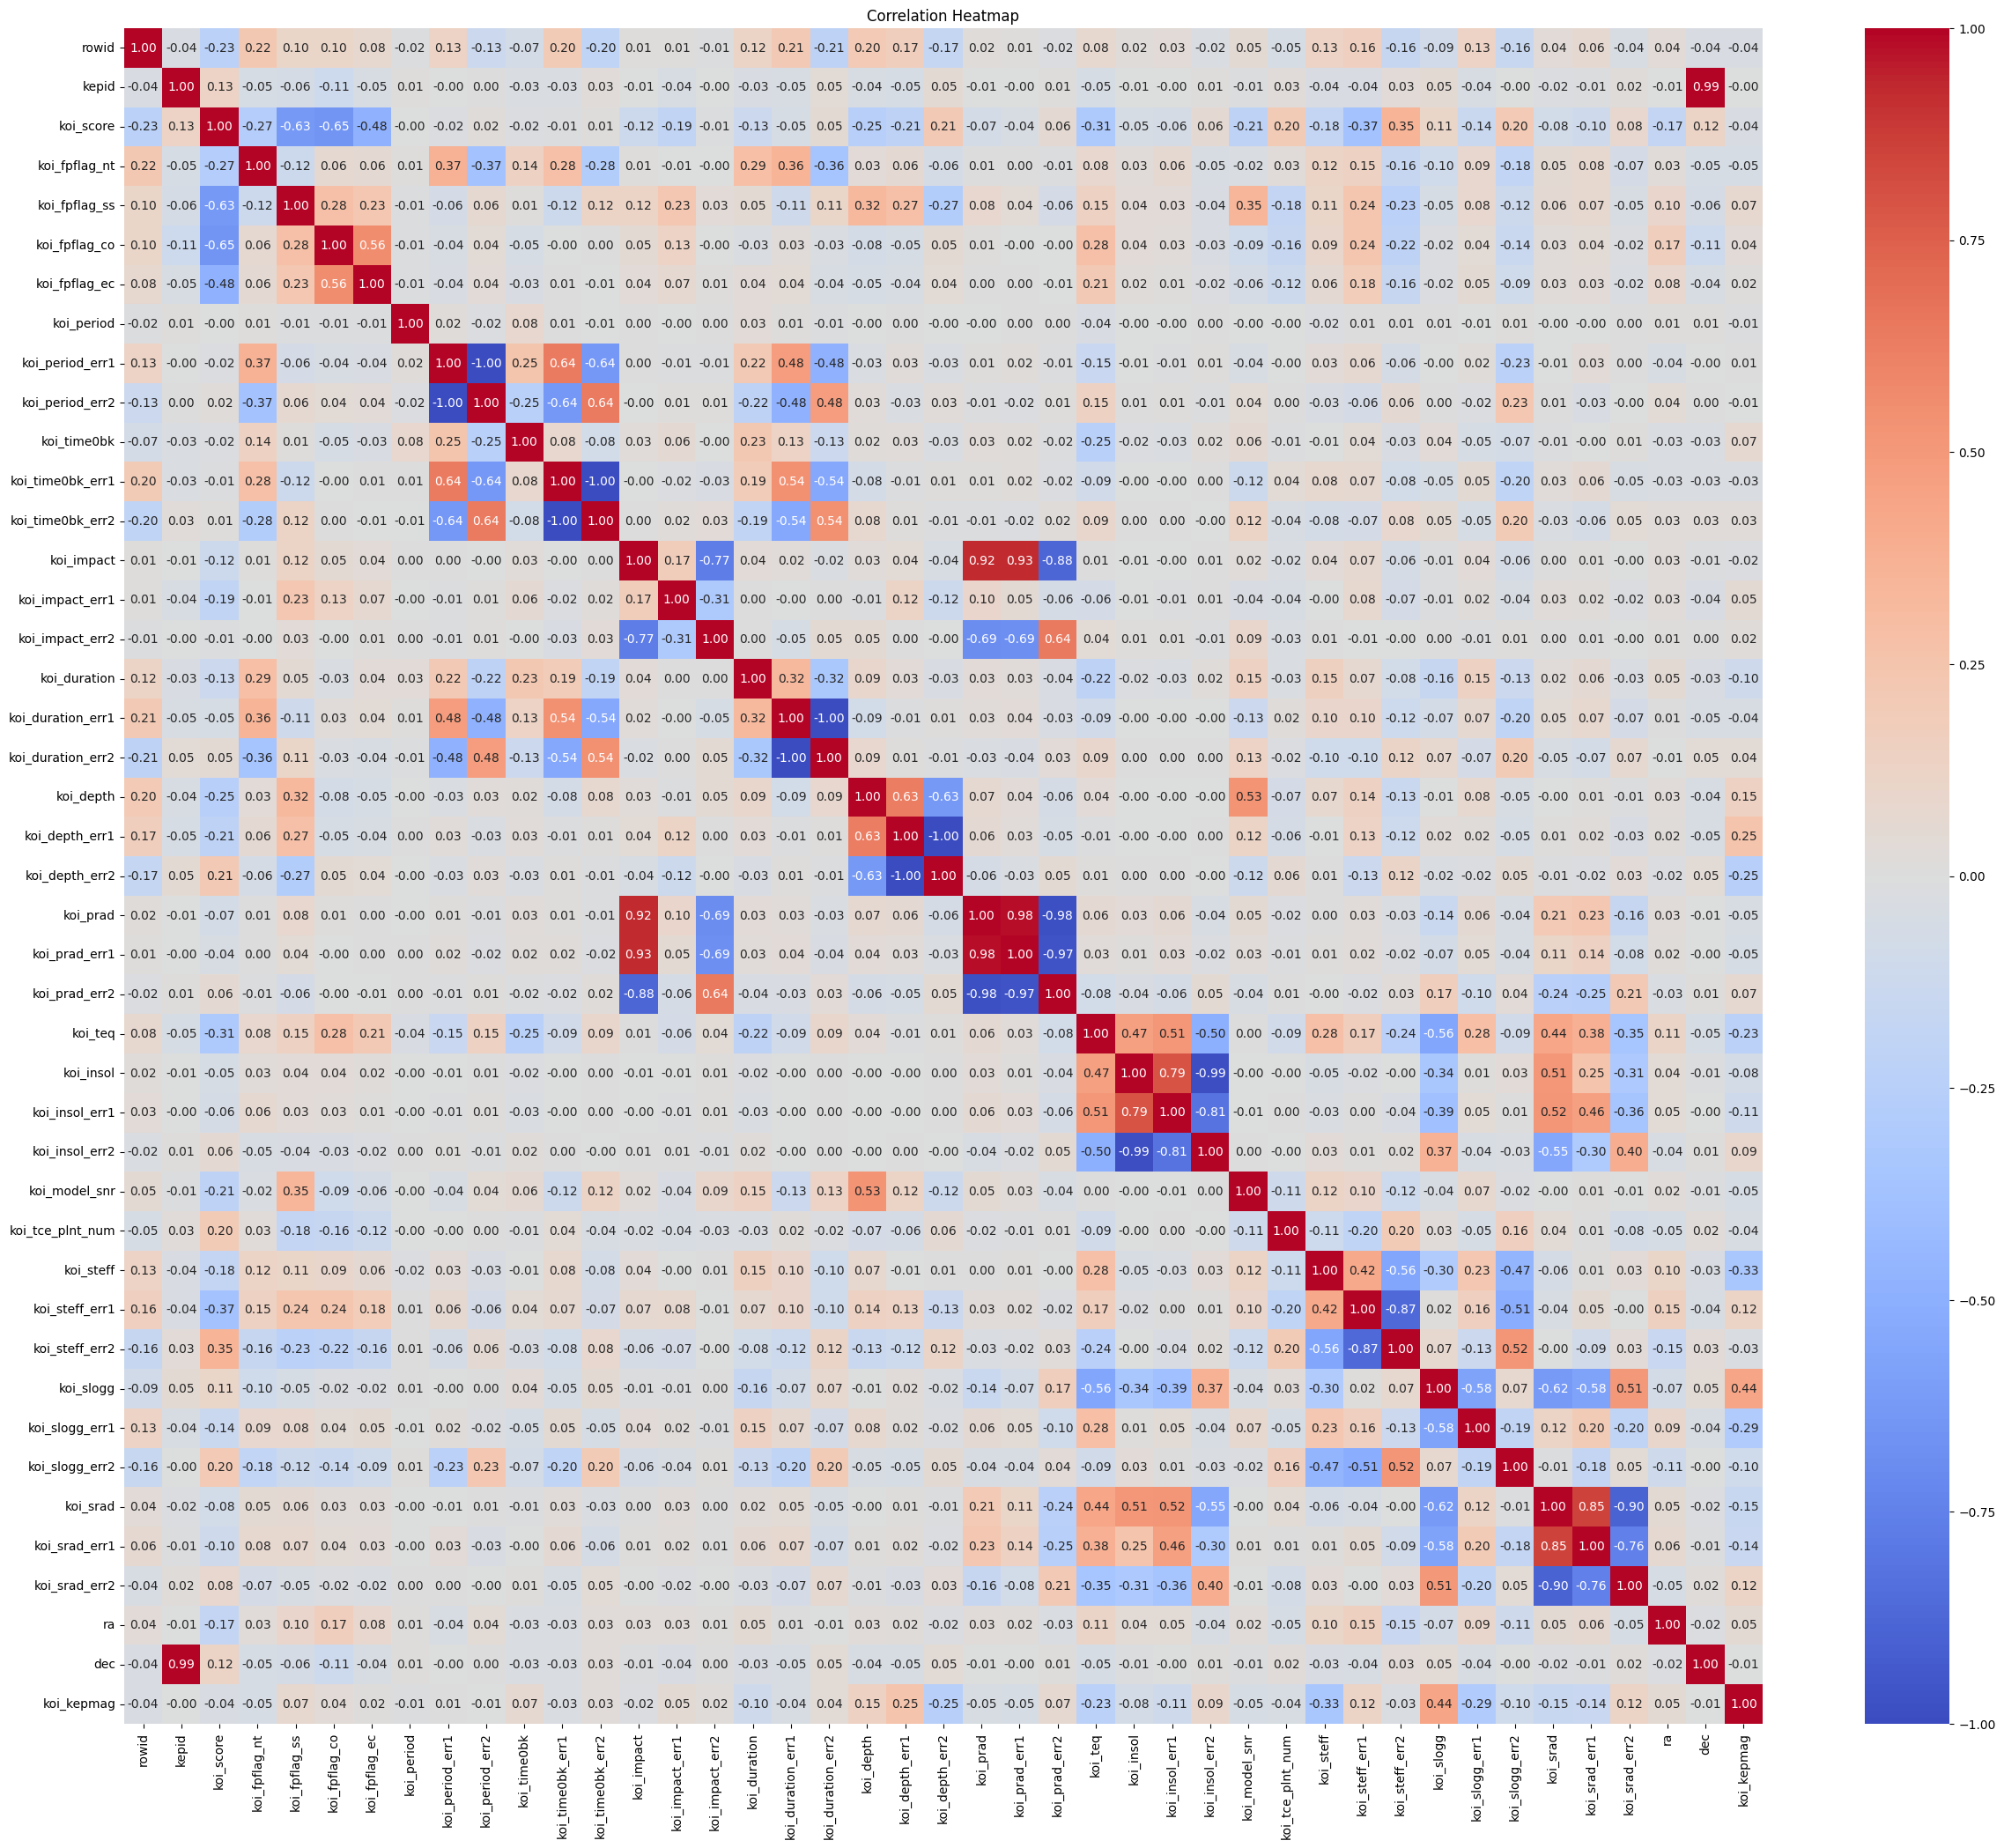

In [ ]:
# Plot heatmap
plt.figure(figsize=(30, 25))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

#cov method to compute the covariance matrix, which represents the degree of joint variability of two random variables.


In [ ]:
# Compute covariance matrix
covariance_matrix = df.cov()
print("Covariance Matrix:")
print(covariance_matrix)


Covariance Matrix:
                          rowid         kepid      koi_score  koi_fpflag_nt  \
rowid              2.371408e+06 -1.483357e+08    -160.475580      93.080349   
kepid             -1.483357e+08  7.229831e+12  149725.186864  -37075.348455   
koi_score         -1.604756e+02  1.497252e+05       0.198143      -0.032671   
koi_fpflag_nt      9.308035e+01 -3.707535e+04      -0.032671       0.076169   
koi_fpflag_ss      6.045659e+01 -6.239646e+04      -0.107854      -0.013044   
koi_fpflag_co      6.210276e+01 -1.188663e+05      -0.113454       0.006772   
koi_fpflag_ec      3.599737e+01 -3.858423e+04      -0.066126       0.005187   
koi_period        -4.269035e+04  6.031581e+07      -0.864017       5.514300   
koi_period_err1    1.123024e+00 -3.599807e+01      -0.000042       0.000571   
koi_period_err2   -1.123024e+00  3.599807e+01       0.000042      -0.000571   
koi_time0bk       -5.853530e+03 -3.782886e+06      -0.517066       1.947480   
koi_time0bk_err1   4.450375e+00 -

<ipython-input-23-c050ad146649>:2: FutureWarning: The default value of numeric_only in DataFrame.cov is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  covariance_matrix = df.cov()


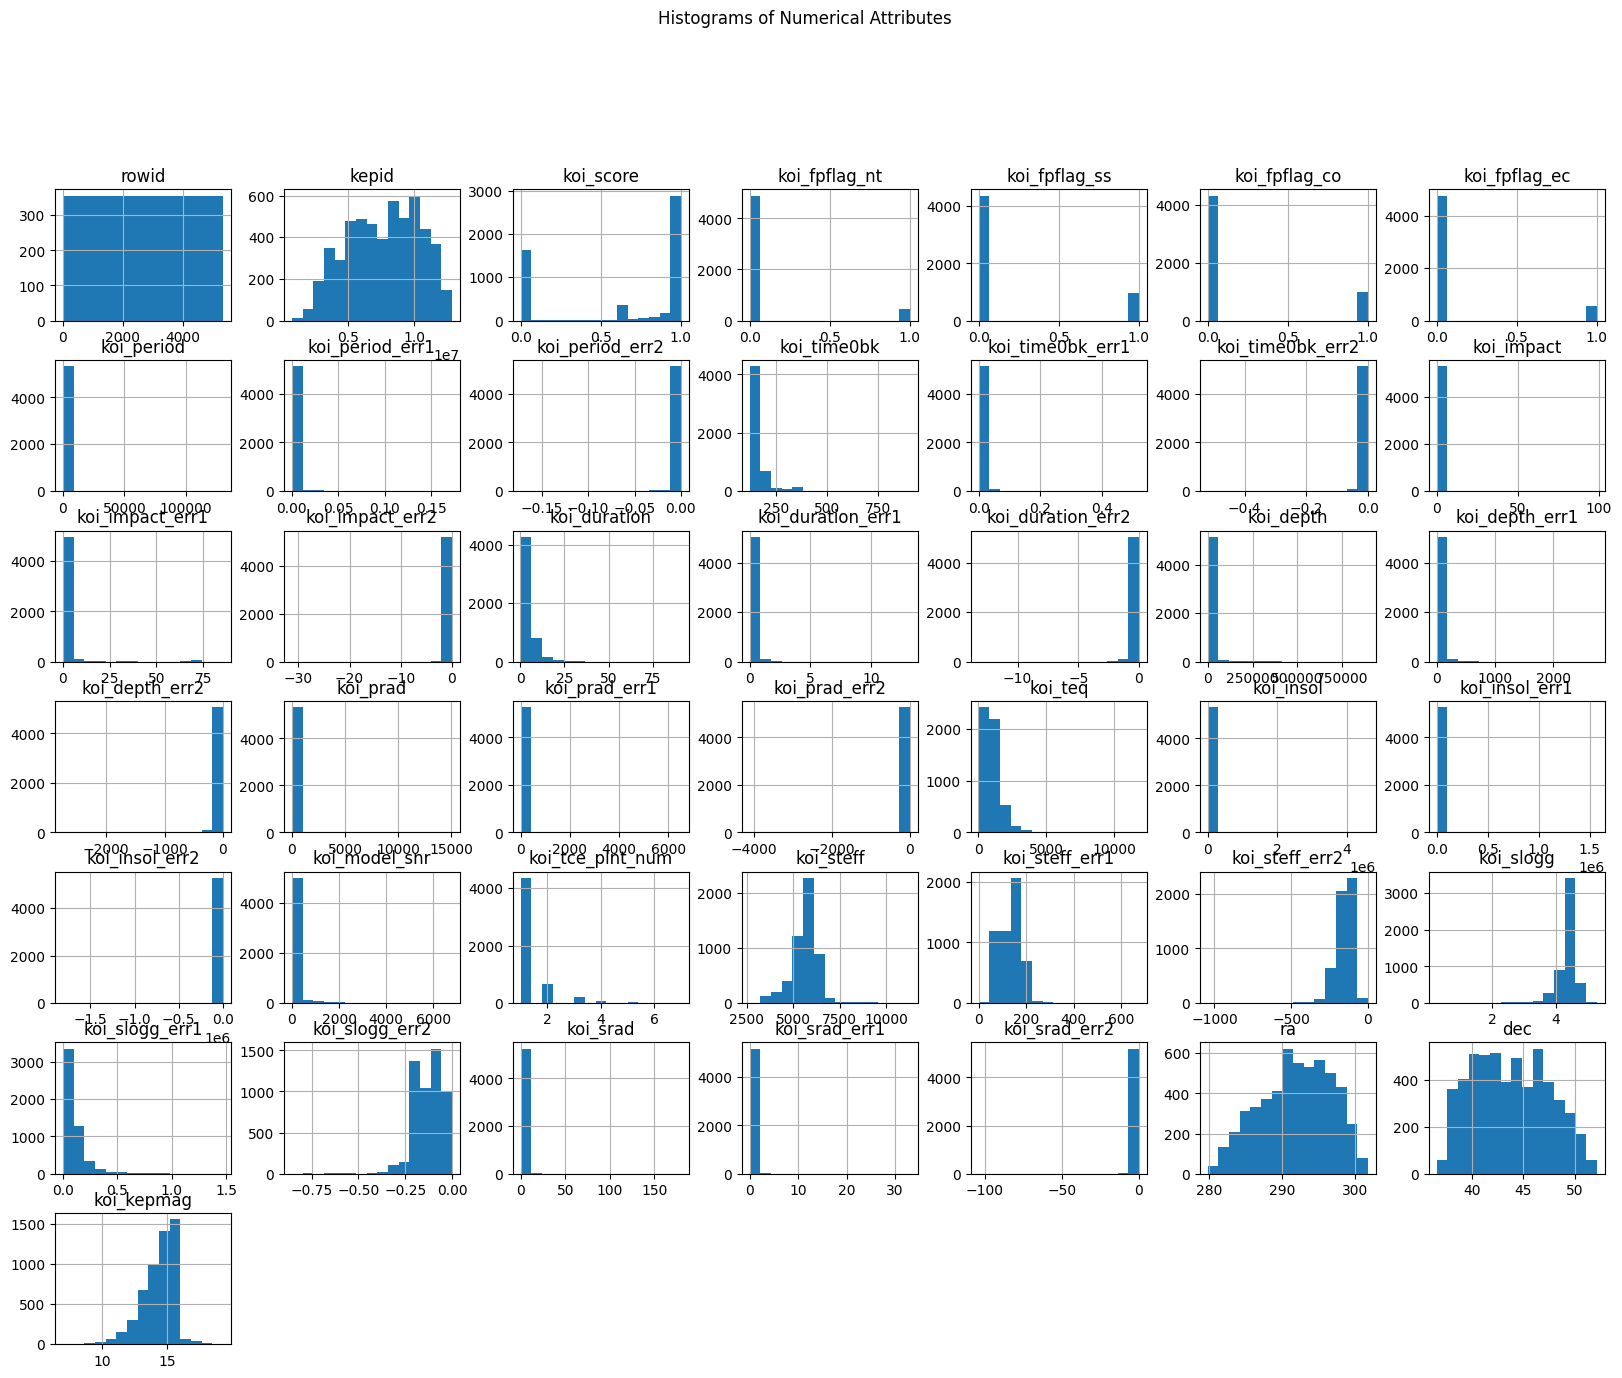

In [ ]:
# Plot histograms for numerical attributes
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_attributes].hist(figsize=(20, 15), bins=15)
plt.suptitle('Histograms of Numerical Attributes', y=1)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler


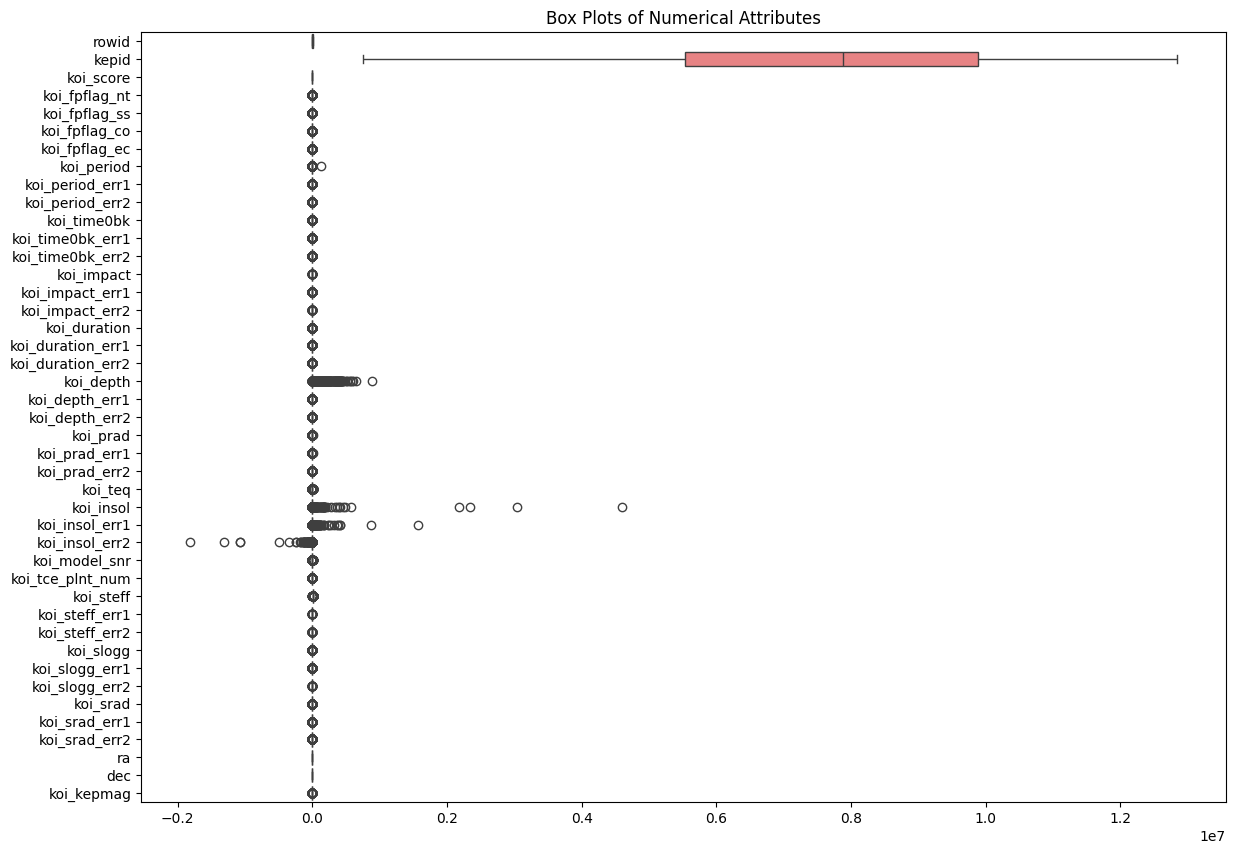

In [ ]:
# Plot box plots for numerical attributes
plt.figure(figsize=(14, 10))
sns.boxplot(data=df[numerical_attributes], orient='h')
plt.title('Box Plots of Numerical Attributes')
plt.show()


Normalize the Data:

In [ ]:
df = pd.read_csv("cumulative.csv")

# Assuming you want to normalize all numerical attributes
numerical_attributes = df.select_dtypes(include=['float64', 'int64']).columns

# Create a StandardScaler instance
scaler = StandardScaler()

# Normalize the numerical attributes
df_normalized = df.copy()
df_normalized[numerical_attributes] = scaler.fit_transform(df[numerical_attributes])

# Display the normalized dataset
print("Normalized Dataset:")
print(df_normalized.head())

Normalized Dataset:
      rowid     kepid kepoi_name   kepler_name koi_disposition  \
0 -1.731870  1.170922  K00752.01  Kepler-227 b       CONFIRMED   
1 -1.731508  1.170922  K00752.02  Kepler-227 c       CONFIRMED   
2 -1.731145  1.176212  K00753.01           NaN  FALSE POSITIVE   
3 -1.730783  1.190143  K00754.01           NaN  FALSE POSITIVE   
4 -1.730421  1.192441  K00755.01  Kepler-664 b       CONFIRMED   

  koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0        CANDIDATE   1.088639      -0.481497      -0.549001      -0.492014   
1        CANDIDATE   1.023635      -0.481497      -0.549001      -0.492014   
2   FALSE POSITIVE  -1.008242      -0.481497       1.821492      -0.492014   
3   FALSE POSITIVE  -1.008242      -0.481497       1.821492      -0.492014   
4        CANDIDATE   1.088639      -0.481497      -0.549001      -0.492014   

   ...  koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0  ...        1.117163   0.362574  

/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1047: RuntimeWarning: invalid value encountered in divide
  updated_mean = (last_sum + new_sum) / updated_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1052: RuntimeWarning: invalid value encountered in divide
  T = new_sum / new_sample_count
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:1072: RuntimeWarning: invalid value encountered in divide
  new_unnormalized_variance -= correction**2 / new_sample_count


 Print the Summary Statistics Again

In [ ]:
summary_statistics_normalized = df_normalized.describe()
print("Summary Statistics for Normalized Data:")
print(summary_statistics_normalized)

Summary Statistics for Normalized Data:
              rowid         kepid     koi_score  koi_fpflag_nt  koi_fpflag_ss  \
count  9.564000e+03  9.564000e+03  8.054000e+03   9.564000e+03   9.564000e+03   
mean   2.377391e-17 -9.806738e-17  5.646230e-17   1.188696e-16   5.646304e-17   
std    1.000052e+00  1.000052e+00  1.000062e+00   1.000052e+00   1.000052e+00   
min   -1.731870e+00 -2.613020e+00 -1.008242e+00  -4.814969e-01  -5.490005e-01   
25%   -8.659349e-01 -8.044992e-01 -1.008242e+00  -4.814969e-01  -5.490005e-01   
50%    0.000000e+00  8.150681e-02 -3.078837e-01  -4.814969e-01  -5.490005e-01   
75%    8.659349e-01  8.225310e-01  1.084445e+00  -4.814969e-01  -5.490005e-01   
max    1.731870e+00  1.976586e+00  1.088639e+00   2.076857e+00   1.821492e+00   

       koi_fpflag_co  koi_fpflag_ec    koi_period  koi_period_err1  \
count   9.564000e+03   9.564000e+03  9.564000e+03     9.110000e+03   
mean   -5.943478e-18  -8.915216e-18  1.485869e-18    -5.615705e-17   
std     1.000052e+00

In [ ]:

print(df_normalized.head())

      rowid     kepid kepoi_name   kepler_name koi_disposition  \
0 -1.731870  1.170922  K00752.01  Kepler-227 b       CONFIRMED   
1 -1.731508  1.170922  K00752.02  Kepler-227 c       CONFIRMED   
2 -1.731145  1.176212  K00753.01           NaN  FALSE POSITIVE   
3 -1.730783  1.190143  K00754.01           NaN  FALSE POSITIVE   
4 -1.730421  1.192441  K00755.01  Kepler-664 b       CONFIRMED   

  koi_pdisposition  koi_score  koi_fpflag_nt  koi_fpflag_ss  koi_fpflag_co  \
0        CANDIDATE   1.088639      -0.481497      -0.549001      -0.492014   
1        CANDIDATE   1.023635      -0.481497      -0.549001      -0.492014   
2   FALSE POSITIVE  -1.008242      -0.481497       1.821492      -0.492014   
3   FALSE POSITIVE  -1.008242      -0.481497       1.821492      -0.492014   
4        CANDIDATE   1.088639      -0.481497      -0.549001      -0.492014   

   ...  koi_steff_err2  koi_slogg  koi_slogg_err1  koi_slogg_err2  koi_srad  \
0  ...        1.117163   0.362574       -0.427149      

1.b part answer

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns

In [ ]:
from tensorflow.keras.datasets import fashion_mnist

In [ ]:
train_data= pd.read_csv("fashion-mnist_train.csv")

In [ ]:
print(train_data)

       label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0          2       0       0       0       0       0       0       0       0   
1          9       0       0       0       0       0       0       0       0   
2          6       0       0       0       0       0       0       0       5   
3          0       0       0       0       1       2       0       0       0   
4          3       0       0       0       0       0       0       0       0   
...      ...     ...     ...     ...     ...     ...     ...     ...     ...   
14675      3       0       0       0       0       0       0       0       0   
14676      0       0       0       0       0       0       0       0      27   
14677      0       0       0       0       0       0       0       0       0   
14678      3       0       0       0       0       0       0       0       0   
14679      8       0       0       0       0       0       0       0       0   

       pixel9  ...  pixel775  pixel776 

In [ ]:
test_data = pd.read_csv("fashion-mnist_test.csv")

In [ ]:
print(test_data)

      label  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0         0       0       0       0       0       0       0       0       9   
1         1       0       0       0       0       0       0       0       0   
2         2       0       0       0       0       0       0      14      53   
3         2       0       0       0       0       0       0       0       0   
4         3       0       0       0       0       0       0       0       0   
...     ...     ...     ...     ...     ...     ...     ...     ...     ...   
9995      0       0       0       0       0       0       0       0       0   
9996      6       0       0       0       0       0       0       0       0   
9997      8       0       0       0       0       0       0       0       0   
9998      8       0       1       3       0       0       0       0       0   
9999      1       0       0       0       0       0       0       0     140   

      pixel9  ...  pixel775  pixel776  pixel777  pi

Load the Fashion MNIST Dataset and Visualize Images

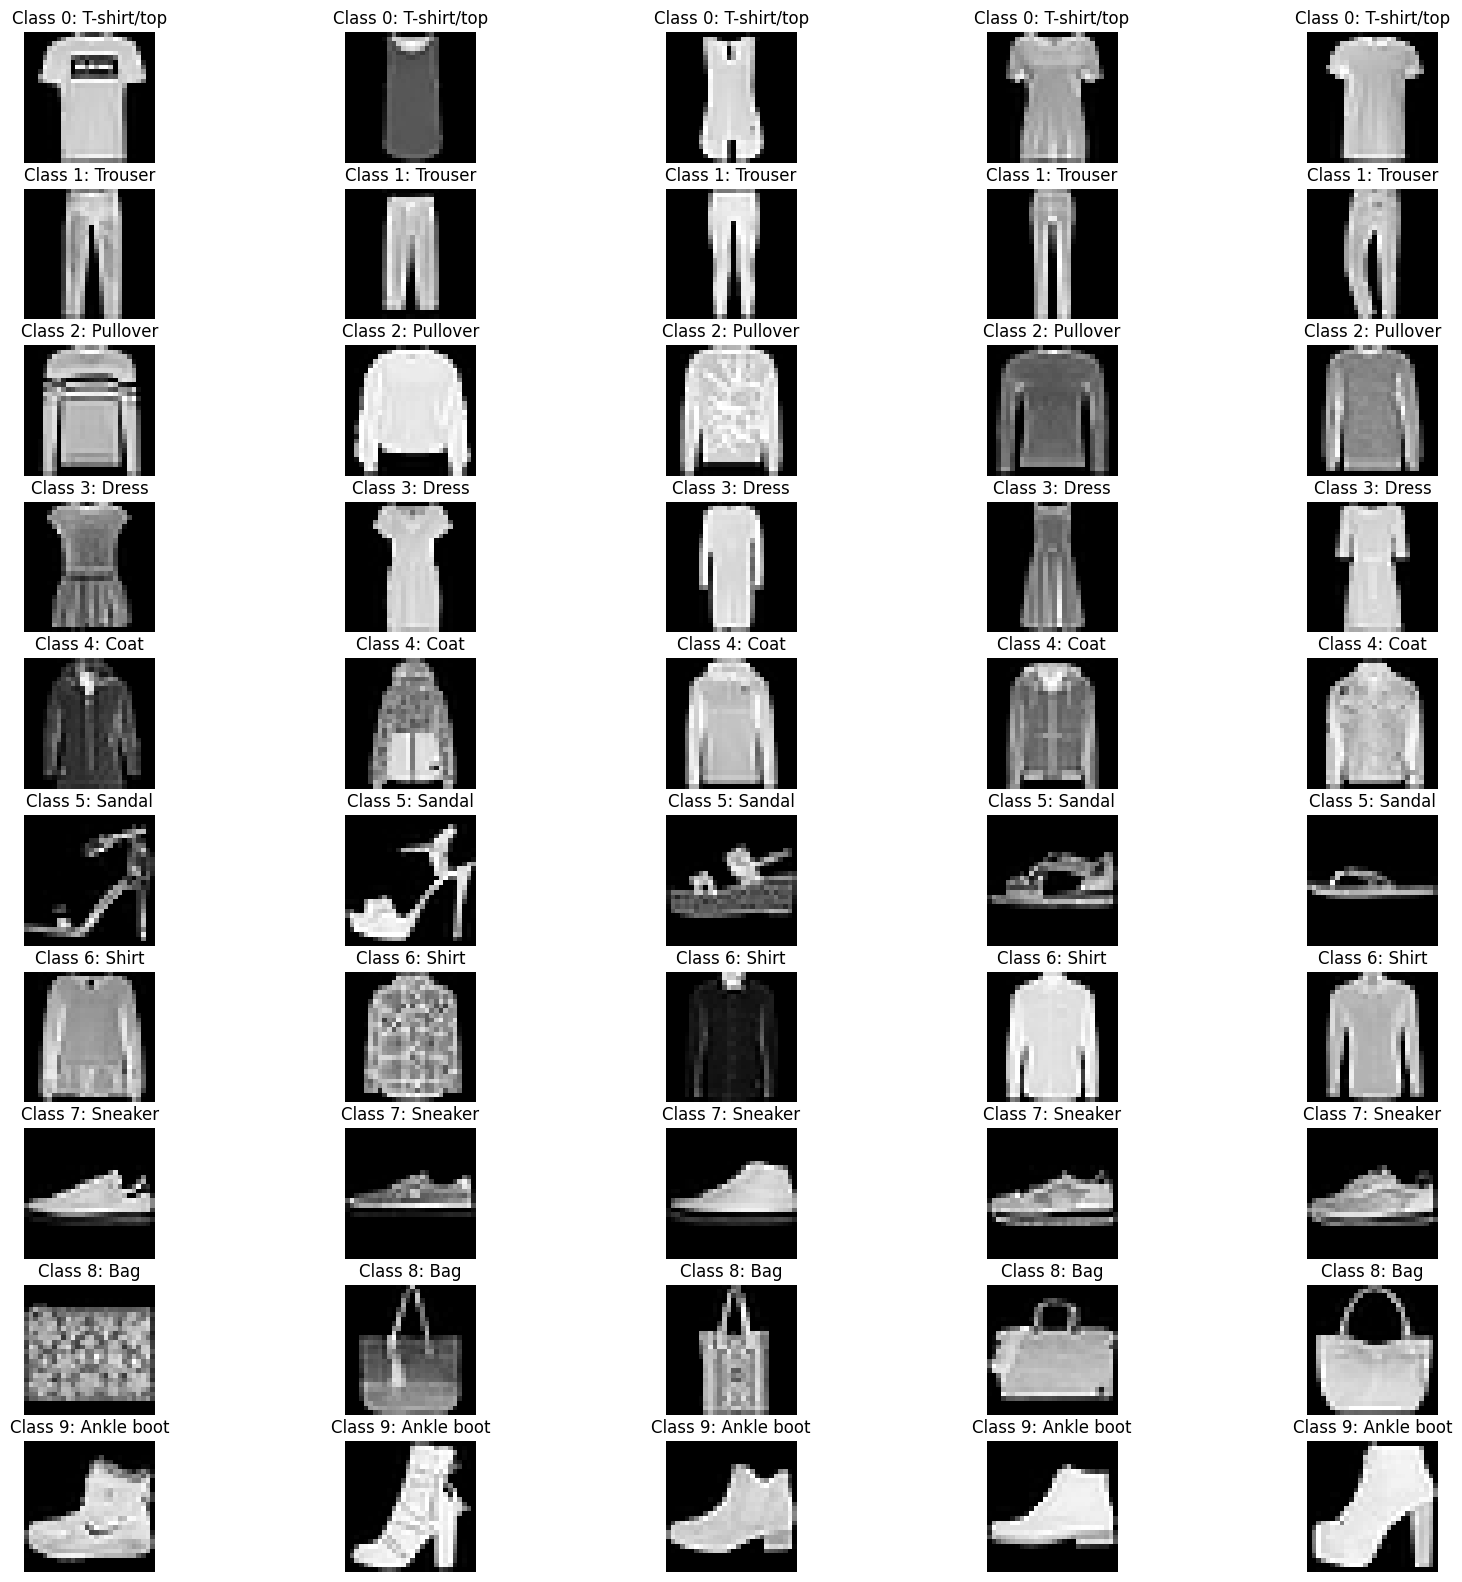

In [ ]:
# Load Fashion MNIST dataset
(train_images, train_labels), (_, _) = fashion_mnist.load_data()

# Define class labels
class_labels = {
    0: 'T-shirt/top',
    1: 'Trouser',
    2: 'Pullover',
    3: 'Dress',
    4: 'Coat',
    5: 'Sandal',
    6: 'Shirt',
    7: 'Sneaker',
    8: 'Bag',
    9: 'Ankle boot'
}

# Visualize five images from each class
plt.figure(figsize=(20, 20))

for label in range(10):
    class_indices = (train_labels == label)
    class_images = train_images[class_indices][:5]

    for i in range(5):
        plt.subplot(10, 5, label * 5 + i + 1)
        plt.imshow(class_images[i], cmap='gray')
        plt.title(f'Class {label}: {class_labels[label]}')
        plt.axis('off')

plt.show()

Perform Exploratory Data Analysis (EDA):
perform eda for data,
Display summary statistics,
display count of each class,
plot histrogram of class distribution


Summary Statistics:
                  0             1             2             3             4  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.000800      0.005783      0.030083      0.103800      0.249683   
std        0.092554      0.249033      0.767868      2.512017      4.331376   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        0.000000      0.000000      0.000000      0.000000      0.000000   
max       16.000000     36.000000    119.000000    164.000000    224.000000   

                  5             6             7             8             9  \
count  60000.000000  60000.000000  60000.000000  60000.000000  60000.000000   
mean       0.414717      0.821667      2.224733      5.698667     14.434650   
std        5.827394      8.3099

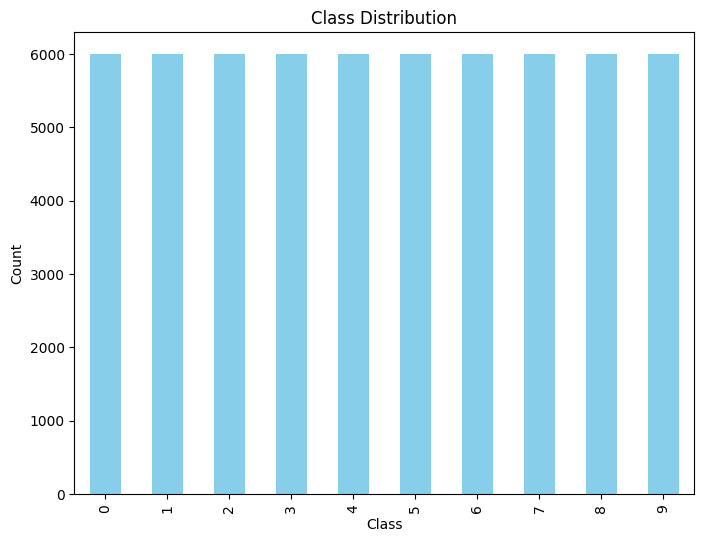

In [ ]:

df = pd.DataFrame(train_images.reshape((train_images.shape[0], -1)))
df['Label'] = train_labels
summary_statistics = df.describe()
print("Summary Statistics:")
print(summary_statistics)


class_counts = df['Label'].value_counts()
print("\Class Counts:")
print(class_counts)

plt.figure(figsize=(8, 6))
df['Label'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title('Class Distribution')
plt.xlabel('Class')
plt.ylabel('Count')
plt.show()


Perform Normalization:

Perform normalization so that every pixel value is in between 0 and 1,,
Display the normalized data



In [ ]:

train_images_normalized = train_images / 255.0


print("Normalized Data:")
print(train_images_normalized[0])  # Displaying the first image as an example


Normalized Data:
[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  